In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 08D9-3AAB

 Directory of C:\Users\mariyam qureshi\Desktop\LR

21-10-2023  20:16    <DIR>          .
21-10-2023  20:16    <DIR>          ..
21-10-2023  19:47    <DIR>          .ipynb_checkpoints
21-10-2023  20:16             5,865 Untitled.ipynb
               1 File(s)          5,865 bytes
               3 Dir(s)  142,313,697,280 bytes free


In [3]:
import pandas as pd

# Specify the file path and delimiter as separate arguments
bank = pd.read_csv('C:/Logistic/bank-full.csv', delimiter=";")

# Now you can access the data using the 'bank' DataFrame.
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# One-Hot Encoding of categrical variables
data = pd.get_dummies(bank, columns = ['job','marital','education','contact','poutcome','month'])
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [7]:
# To see all columns
pd.set_option("display.max.columns", None)
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,no,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

In [9]:
# Custom Binary Encoding of Binary o/p variables 
data['default'] = np.where(data['default'].str.contains("yes"), 1, 0)
data['housing'] = np.where(data['housing'].str.contains("yes"), 1, 0)
data['loan'] = np.where(data['loan'].str.contains("yes"), 1, 0)
data['y'] = np.where(data['y'].str.contains("yes"), 1, 0)
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  bool 
 12  job_blue-collar      45211 non-null  bool 
 13  job_entrepreneur     45211 non-null  bool 
 14  job_housemaid        45211 non-null  bool 
 15  job_management       45211 non-null  bool 
 16  job_retired          4

In [11]:
# Model Building
# Dividing our data into input and output variables
x = pd.concat([data.iloc[:,0:10], data.iloc[:,11:]],axis=1)
y = data.iloc[:,10]

In [12]:
# Logistic regression model
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\mariyam qureshi\OneDrive\Documents\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Predict for x dataset
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [14]:
y_pred_df = pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [15]:
# Testing Model Accuracy
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39152,   770],
       [ 4127,  1162]], dtype=int64)

In [16]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39158 + 1158)/(39158 + 764 + 4131 + 1158)

0.8917298887438898

In [17]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1]

array([0.04415043, 0.02470598, 0.01819021, ..., 0.66946912, 0.07896329,
       0.10143938])

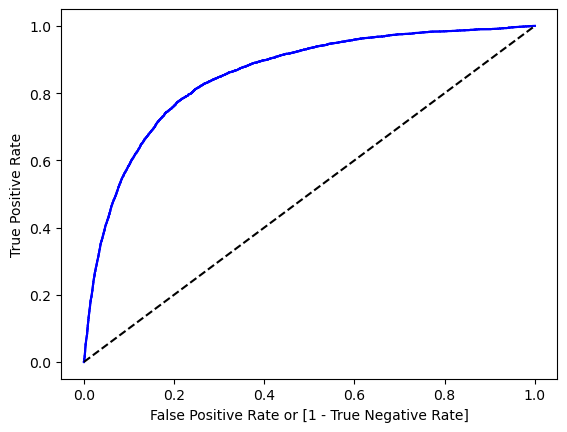

auc accuracy: 0.6002068279694848


In [18]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color = 'blue')
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color ='blue',label = 'logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)